In [74]:
#Import
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from math import sqrt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

import os 

In [75]:
#Dataset
data = pd.read_csv('/Users/huntermarcelo/Downloads/breast cancer (1).csv')

x = data.copy()
x = x.drop(['diagnosis', 'id'], axis=1)
y = data["diagnosis"]
y = y.replace(to_replace="M", value=0)
y = y.replace(to_replace="B", value=1)

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 555)

print(x_train.shape)
print(x_test.shape)

print('Shape: ', data.shape)
print(' ')
print(data.dtypes)
print(' ')
print(data.head)


Features:  ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
            'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 
            'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
            'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 
            'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
            'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Labels:  ['M' 'B'] #m = malignant, b = benign


(426, 30)
(143, 30)
Shape:  (569, 32)
 
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_wor

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

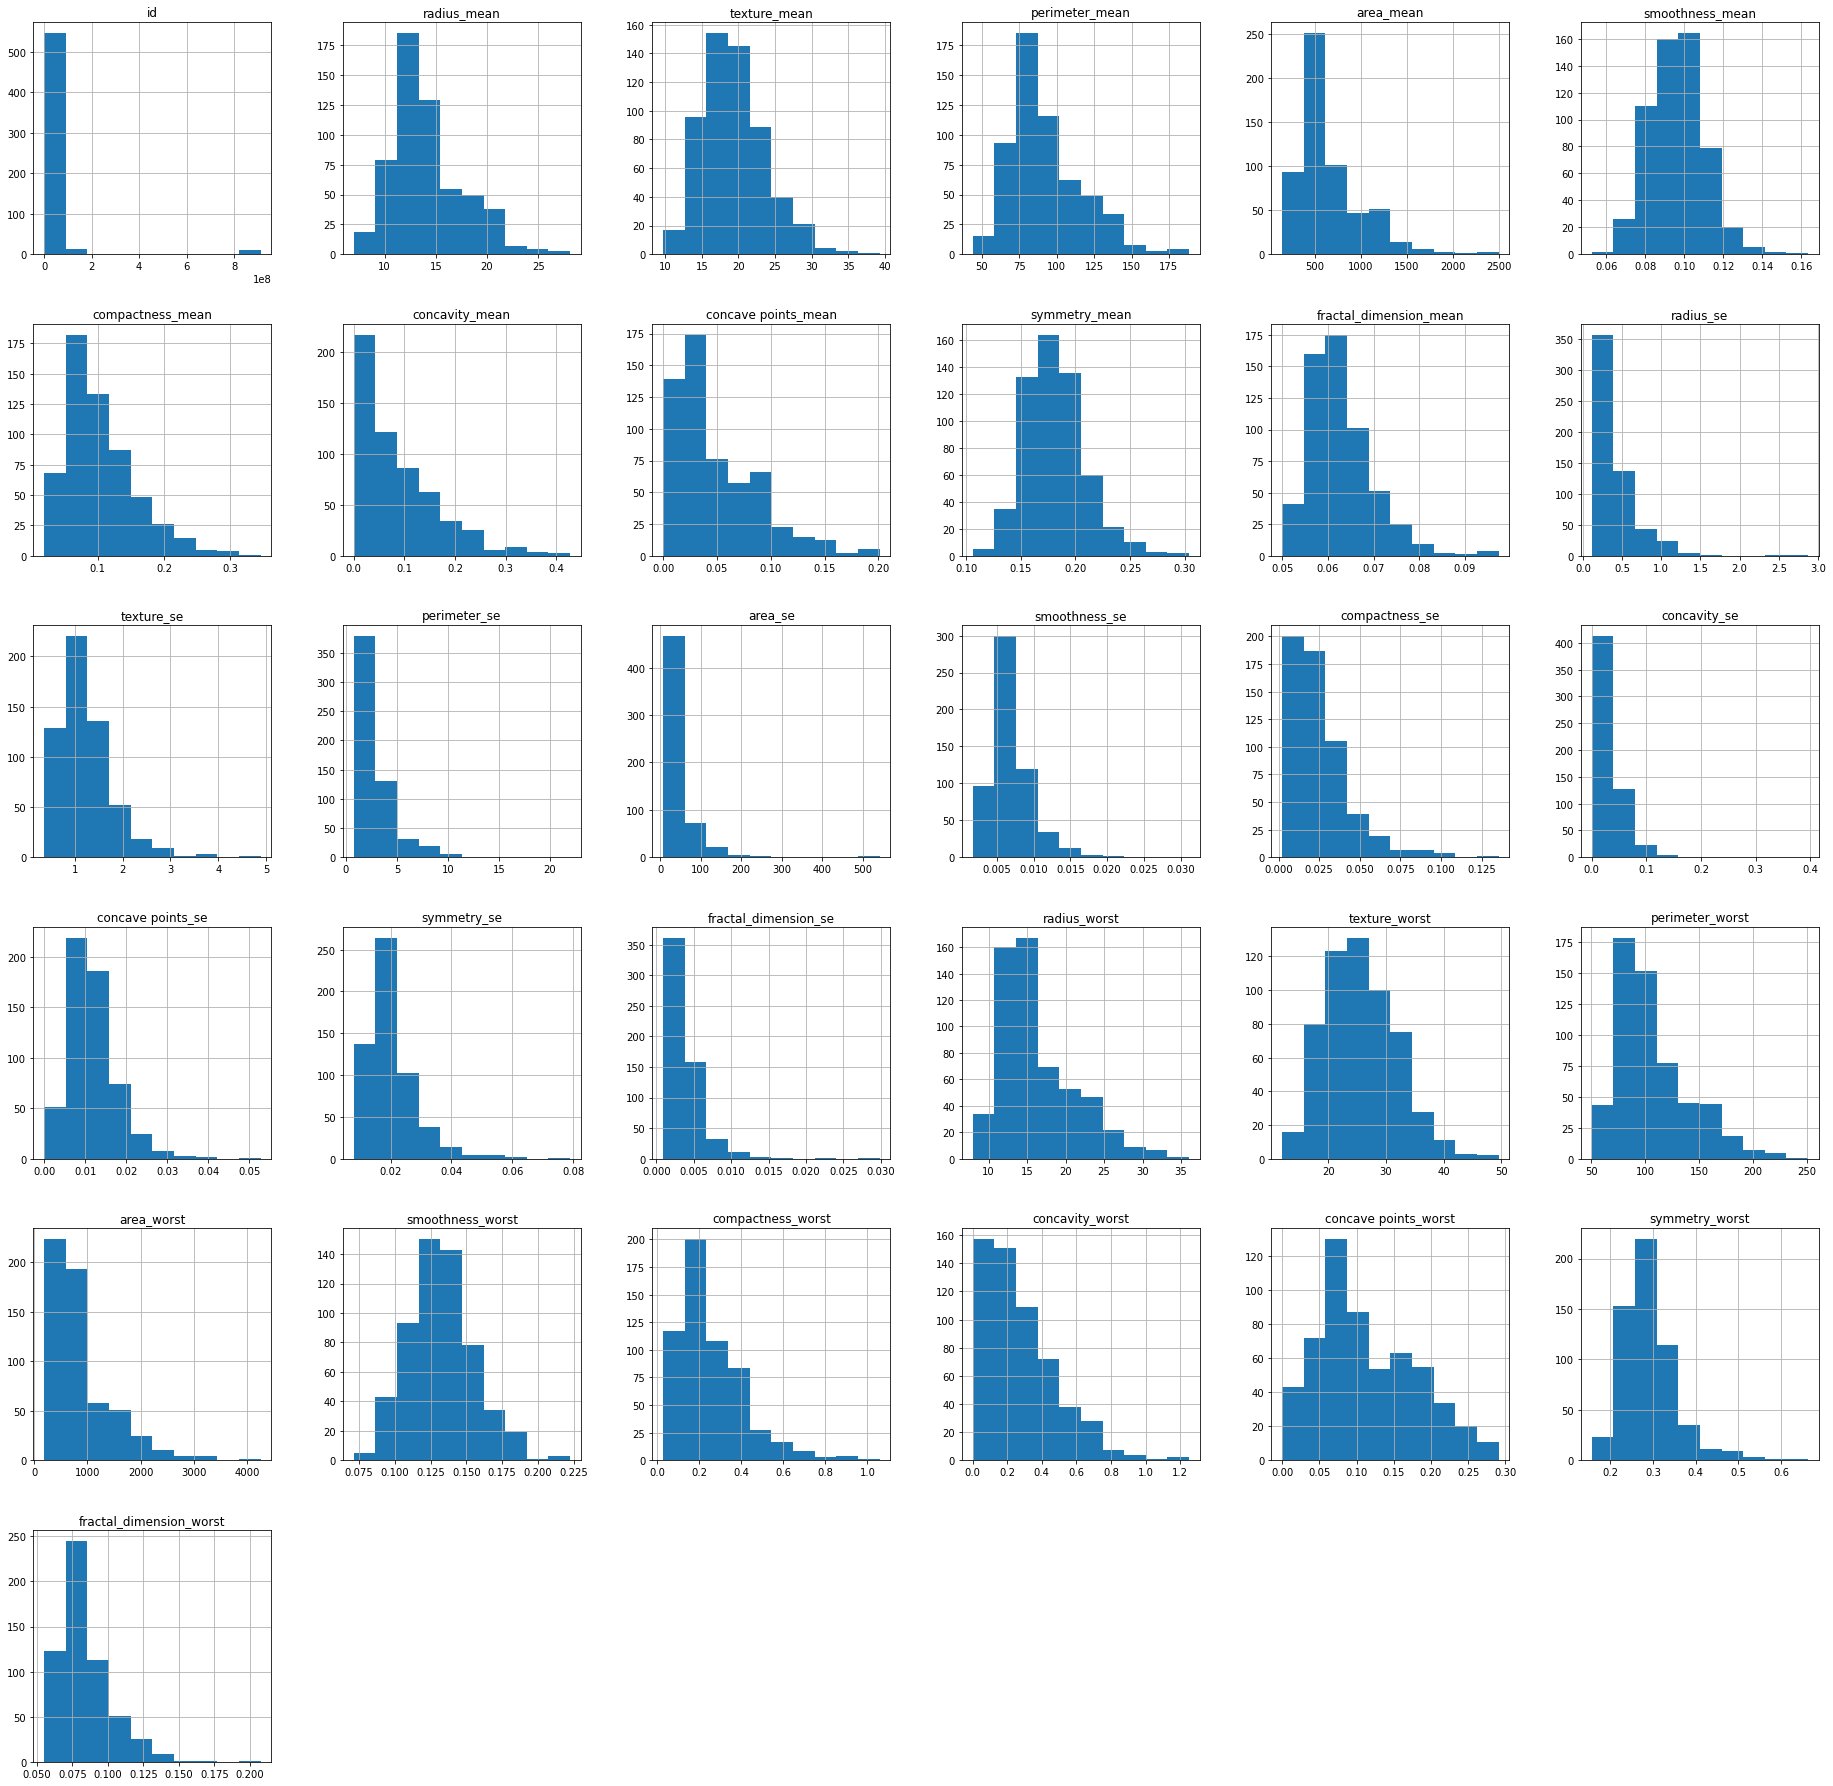

In [76]:
data.hist(figsize=(32,32))
plt.hist(y)

In [77]:
data.describe()
data.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Accuracy for SVC (Train):  0.8985835019640519
Accuracy for SVC (Test):  0.6499388004895961
RMSE for SVC (Train): 0.15321285325897388
RMSE for SVC (Test): 0.28968272975116055
Precision for SVC: 0.8936170212765957


<AxesSubplot:>

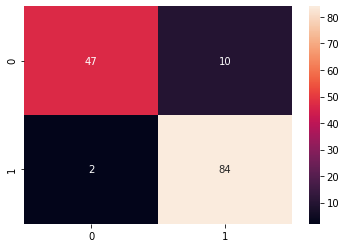

In [78]:
#SVM Classification

x = data.copy()
x = x.drop(['diagnosis', 'id'], axis=1)
y = data["diagnosis"]
y = y.replace(to_replace="M", value=0)
y = y.replace(to_replace="B", value=1)

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 555)

svc = svm.SVC(kernel='linear')  #newdata = data.astype(np.int)

svc.fit(x_train, y_train)

y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)

nnr_output = svc.score(x_test, y_test)

accuracy_train = r2_score(y_train, y_pred_train)
print("Accuracy for SVC (Train): ", accuracy_train)

accuracy_test = r2_score(y_test, y_pred_test)
print("Accuracy for SVC (Test): ", accuracy_test)

rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for SVC (Train):", rmse_train)

rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for SVC (Test):", rmse_test)

print("Precision for SVC:",metrics.precision_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot = True)



Accuracy for KNN (Train):  0.8073086537316987
Accuracy for KNN (Test):  0.6499388004895961
RMSE for KNN (Train): 0.21118934387685415
RMSE for KNN (Test): 0.28968272975116055
Precision for KNN: 0.8936170212765957


<AxesSubplot:>

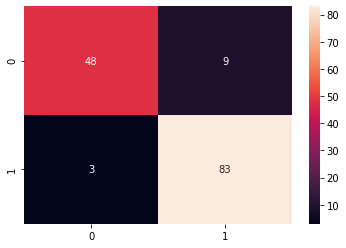

In [79]:
#K-Nearest Neighbors Classification

x = data.copy()
x = x.drop(['diagnosis', 'id'], axis=1)
y = data["diagnosis"]
y = y.replace(to_replace="M", value=0)
y = y.replace(to_replace="B", value=1)

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 555)

knn = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)

y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

nnr_output = knn.score(x_test, y_test)

accuracy_train = r2_score(y_train, y_pred_train)
print("Accuracy for KNN (Train): ", accuracy_train)

accuracy_test = r2_score(y_test, y_pred_test)
print("Accuracy for KNN (Test): ", accuracy_test)

rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for KNN (Train):", rmse_train)

rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for KNN (Test):", rmse_test)

print("Precision for KNN:",metrics.precision_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot = True)



Accuracy for GPR (Train):  0.8478752529460779
Accuracy for GPR (Test):  0.737454100367197
RMSE for GPR (Train): 0.18764665626020038
RMSE for GPR (Test): 0.25087260300212727
Precision for GPR: 0.8936170212765957


<AxesSubplot:>

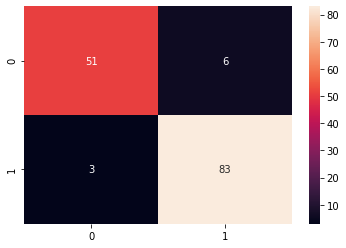

In [80]:
#Logistic Regression Classification 

x = data.copy()
x = x.drop(['diagnosis', 'id'], axis=1)
y = data["diagnosis"]
y = y.replace(to_replace="M", value=0)
y = y.replace(to_replace="B", value=1)

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 555)

logr = LogisticRegression(max_iter=10000).fit(x, y)

y_pred_train = logr.predict(x_train)
y_pred_test = logr.predict(x_test)

nnr_output = logr.score(x_test, y_test)

accuracy_train = r2_score(y_train, y_pred_train)
print("Accuracy for LogR (Train): ", accuracy_train)

accuracy_test = r2_score(y_test, y_pred_test)
print("Accuracy for LogR (Test): ", accuracy_test)

rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for LogR (Train):", rmse_train)

rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for LogR (Test):", rmse_test)

print("Precision for LogR:",metrics.precision_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot = True)
